In [7]:
import math
import numpy as np
from numpy.lib.polynomial import poly
import matplotlib.pyplot as plt
from zplane import zplane
from scipy.signal import freqz
from scipy.fft import fft
from scipy.signal import lfilter as filter



In [8]:
#definir polos y cero
r1 = 0.95
r2 = 0.80
toRadians = lambda g: g * math.pi / 180
a1 = toRadians(45)
a2 = toRadians(30)
a3 = toRadians(60) 


In [9]:
toPolar = lambda r, ang : r * np.exp(1j * ang)
p = [toPolar(r1, a1), toPolar(r1, -a1), toPolar(r1, a1), toPolar(r1, -a1)]
c = [toPolar(r1, a2), toPolar(r1, -a2), toPolar(r2, a3), toPolar(r2, -a3)]


p y c son los cero del denominador y del numerador respectivamente. Por lo tanto se debe obtener los coeficintes de los polinomios, para armar la funcion de transferencia H(z)

In [10]:
#polinomios
num = np.poly(c)
den = poly(p)


# Ejericio 1a
Genere el diagrama de polos y ceros en el plano Z.

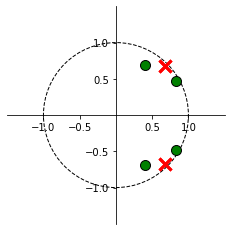

(array([0.82272413+0.475j     , 0.82272413-0.475j     ,
        0.4       +0.69282032j, 0.4       -0.69282032j]),
 array([0.67175146+0.67175144j, 0.67175146-0.67175144j,
        0.67175142+0.67175145j, 0.67175142-0.67175145j]),
 0.7919275938372156)

In [6]:
zplane(num, den)

# Ejericio 1b
Encuentre, evalúe y grafique la respuesta en frecuencia del filtro entre 0 y π.

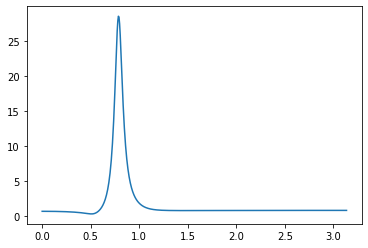

In [7]:

w, h = freqz(num, den)

plt.plot(w, np.abs(h))

# Ejercicio 1c
Normalice los coeficientes del filtro, de manera que el valor máximo de
la respuesta en frecuencia sea 1.

## Solución
El mayor punto se da en el polo, por lo tanto se debe dividir los coeficintes por el valor en que se obtiene en el punto del polo.

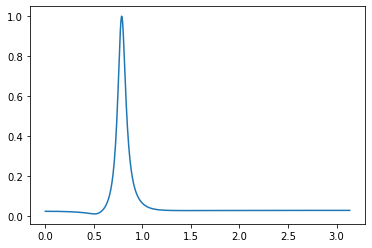

In [11]:
z_polo = np.exp(1j * a1 ) # z en el angulor 45° y radio 1, el polo se encuentra a 45°
num_nor = sum( [c * z_polo**(-pot) for (pot, c) in enumerate(num)] ) 
den_nor = sum( [c * z_polo**(-pot) for (pot, c) in enumerate(den)] ) 
normalizado = abs(num_nor/den_nor)
num = num/normalizado
w, h = freqz(num, den)

plt.plot(w, np.abs(h))

# Ejercicio 1e
Este filtro está diseñado de manera de que cuando se utiliza con señales
muestreadas a 200 Hz la banda de paso se centre en 25 Hz. Para com-
probar esto, genere una señal sumando dos senoidales de 15 Hz y 25 Hz,
para luego filtrarla con el filtro normalizado. Grafique la señal original,
la señal filtrada y sus espectros, y analice el resultado.

## señal original

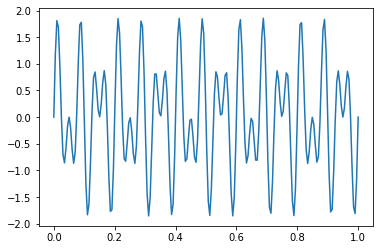

In [9]:
#generar la señales senoidales sumadas
fm = 200
T = 1/fm
ts = np.linspace(0, 1, num=fm)
x = np.sin(2 * np.pi * 15 * ts) + np.sin(2 * np.pi * 25 * ts)
plt.plot(ts, x)



## señal filtrada

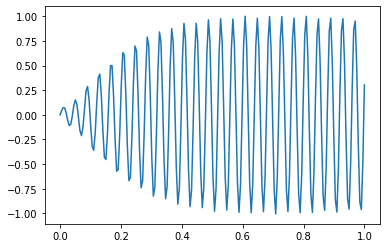

In [10]:
#señal filtrada
from scipy.signal import lfilter as filter

y = filter(num, den, x)

plt.plot(ts, y)


## espectro de ambas señales

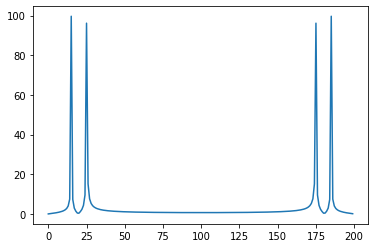

In [31]:
from scipy.fft import fft, fftfreq
X = fft(x)
Y = fft(y)
N = fm
xf = fftfreq(N, T)

plt.plot(np.abs(X))

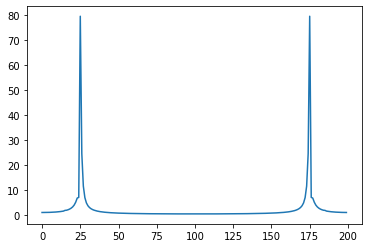

In [32]:
plt.plot(np.abs(Y))

# Ejercicio 1f
Repita el ı́tem anterior pero esta vez genere la señal con una frecuencia
de muestreo de 120 Hz. Compare el resultado con el caso anterior y
obtenga conclusiones.

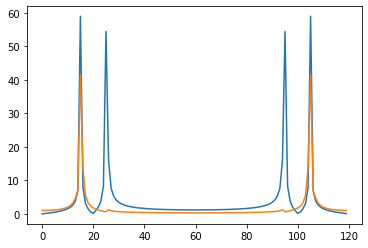

In [13]:
fm = 120
T = 1/fm
ts = np.linspace(0, 1, num=fm)
x = np.sin(2 * np.pi * 15 * ts) + np.sin(2 * np.pi * 25 * ts)
#plt.plot(ts, x)

y = filter(num, den, x)

X = fft(x)
Y = fft(y)
N = fm


plt.plot(np.abs(X))

plt.plot(np.abs(Y))
plt.show()